# CSC 306 Exploratory Data Analysis Final Project
###### (due Dec. 16th)


In [ ]:
# Loading modules - see the help page to see which modules you should load and how!!!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from scipy.stats import linregress
colors = sns.color_palette('colorblind')
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Loading data 

In [ ]:
# loading data (filled in for you!):

# From Our World in Data
world_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates=['date'])
us_vax = world_vax[world_vax['location']=='United States']
state_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv', parse_dates=['date'])

# From the LA Times
county_vax = pd.read_csv('https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-vaccination-county-totals.csv', parse_dates=['date'])

# From the New York Times 
us_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', parse_dates=['date'])
state_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv', parse_dates=['date'])
county_data_2020 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2020.csv', parse_dates=["date"])
county_data_2021 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2021.csv', parse_dates=["date"])
county_data = pd.concat([county_data_2020, county_data_2021]) # making one big file for county data


In [ ]:
us = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', parse_dates=['date'])
us_states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv', parse_dates=['date'])

counties = pd.concat([county_data_2020, county_data_2021])

## A Comparison of Average Cases per 100,000 between California and New York


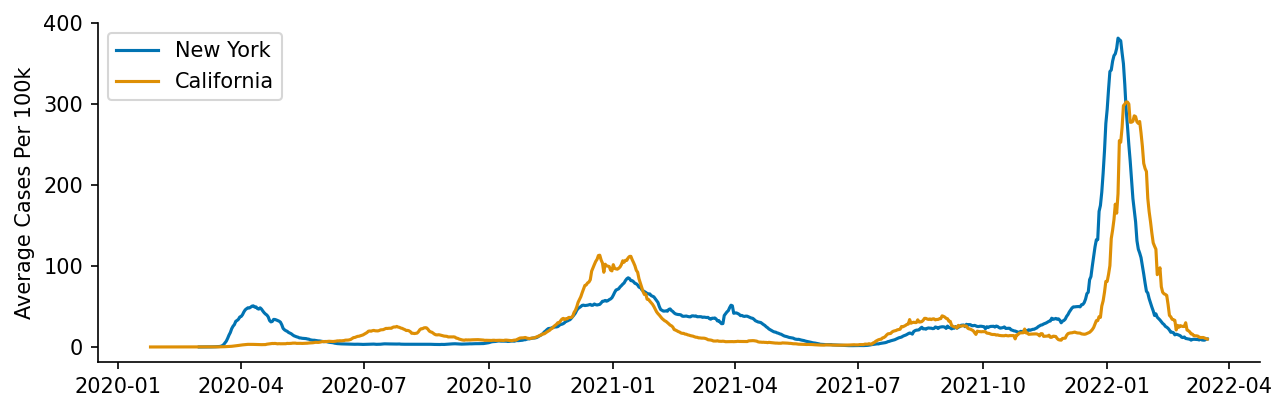

In [ ]:

states_Amer = ["New York", "California"]
fig, sub = plt.subplots(1, 1, figsize=(10,3), dpi=150, sharex=True)
i = 0
sub.set_ylabel('Average Cases Per 100k')

for place in states_Amer:
    tmp = us_states[us_states['state']==place]
    sub.plot(tmp['date'],tmp['cases_avg_per_100k'], label = states_Amer[i], color=colors[i])
    i += 1

sub.legend()
sns.despine()

#make dates sideways


## 1b) Measuring R at three time intervals in New York and California
* March 14 - April 1st, 2020
* November 20th - December 20th, 2020
* February 1st - March 1st, 2021



In [ ]:
'''
March 14 - April 1st, 2020
November 20th - December 20th, 2020
February 1st - March 1st, 2021
'''
NY_1 = get_r_global('New York', dt.datetime(2020, 3, 14), dt.datetime(2020, 4, 1))
Ca_1 = get_r_global('California', dt.datetime(2020, 3, 14), dt.datetime(2020, 4, 1))
print('The R value between March 14 and April 1st 2020 in New York was', NY_1)
print('The R value between March 14 and April 1st 2020 in California was', Ca_1)

print('\n')


NY_2 = get_r_global('New York', dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))
Ca_2 = get_r_global('California', dt.datetime(2020, 11, 20), dt.datetime(2020, 12, 20))
print('The R value between November 20 and December 20 2020 in New York was', NY_2)
print('The R value between November 20 and December 20 2020 in California was', Ca_2)

print('\n')


NY_3 = get_r_global('New York', dt.datetime(2021, 2, 1), dt.datetime(2021, 3, 1))
Ca_3 = get_r_global('California', dt.datetime(2021, 2, 1), dt.datetime(2021, 3, 1))
print('The R value between February 1 and March 1 2021 in New York was', NY_3)
print('The R value between February 1 and March 1 2021 in California was', Ca_3)


The R value between March 14 and April 1st 2020 in New York was 6.016433342707809
The R value between March 14 and April 1st 2020 in California was 2.810597802083794


The R value between November 20 and December 20 2020 in New York was 1.2392934214696347
The R value between November 20 and December 20 2020 in California was 1.2930863356846372


The R value between February 1 and March 1 2021 in New York was 0.9125593295798026
The R value between February 1 and March 1 2021 in California was 0.9009879243869238


## 1c) The Story of Corona Virus in San Diego County
 

In [ ]:
san_Diego = counties[counties['county']=='San Diego']
sd_Vax = county_vax[county_vax['county']=='San Diego']

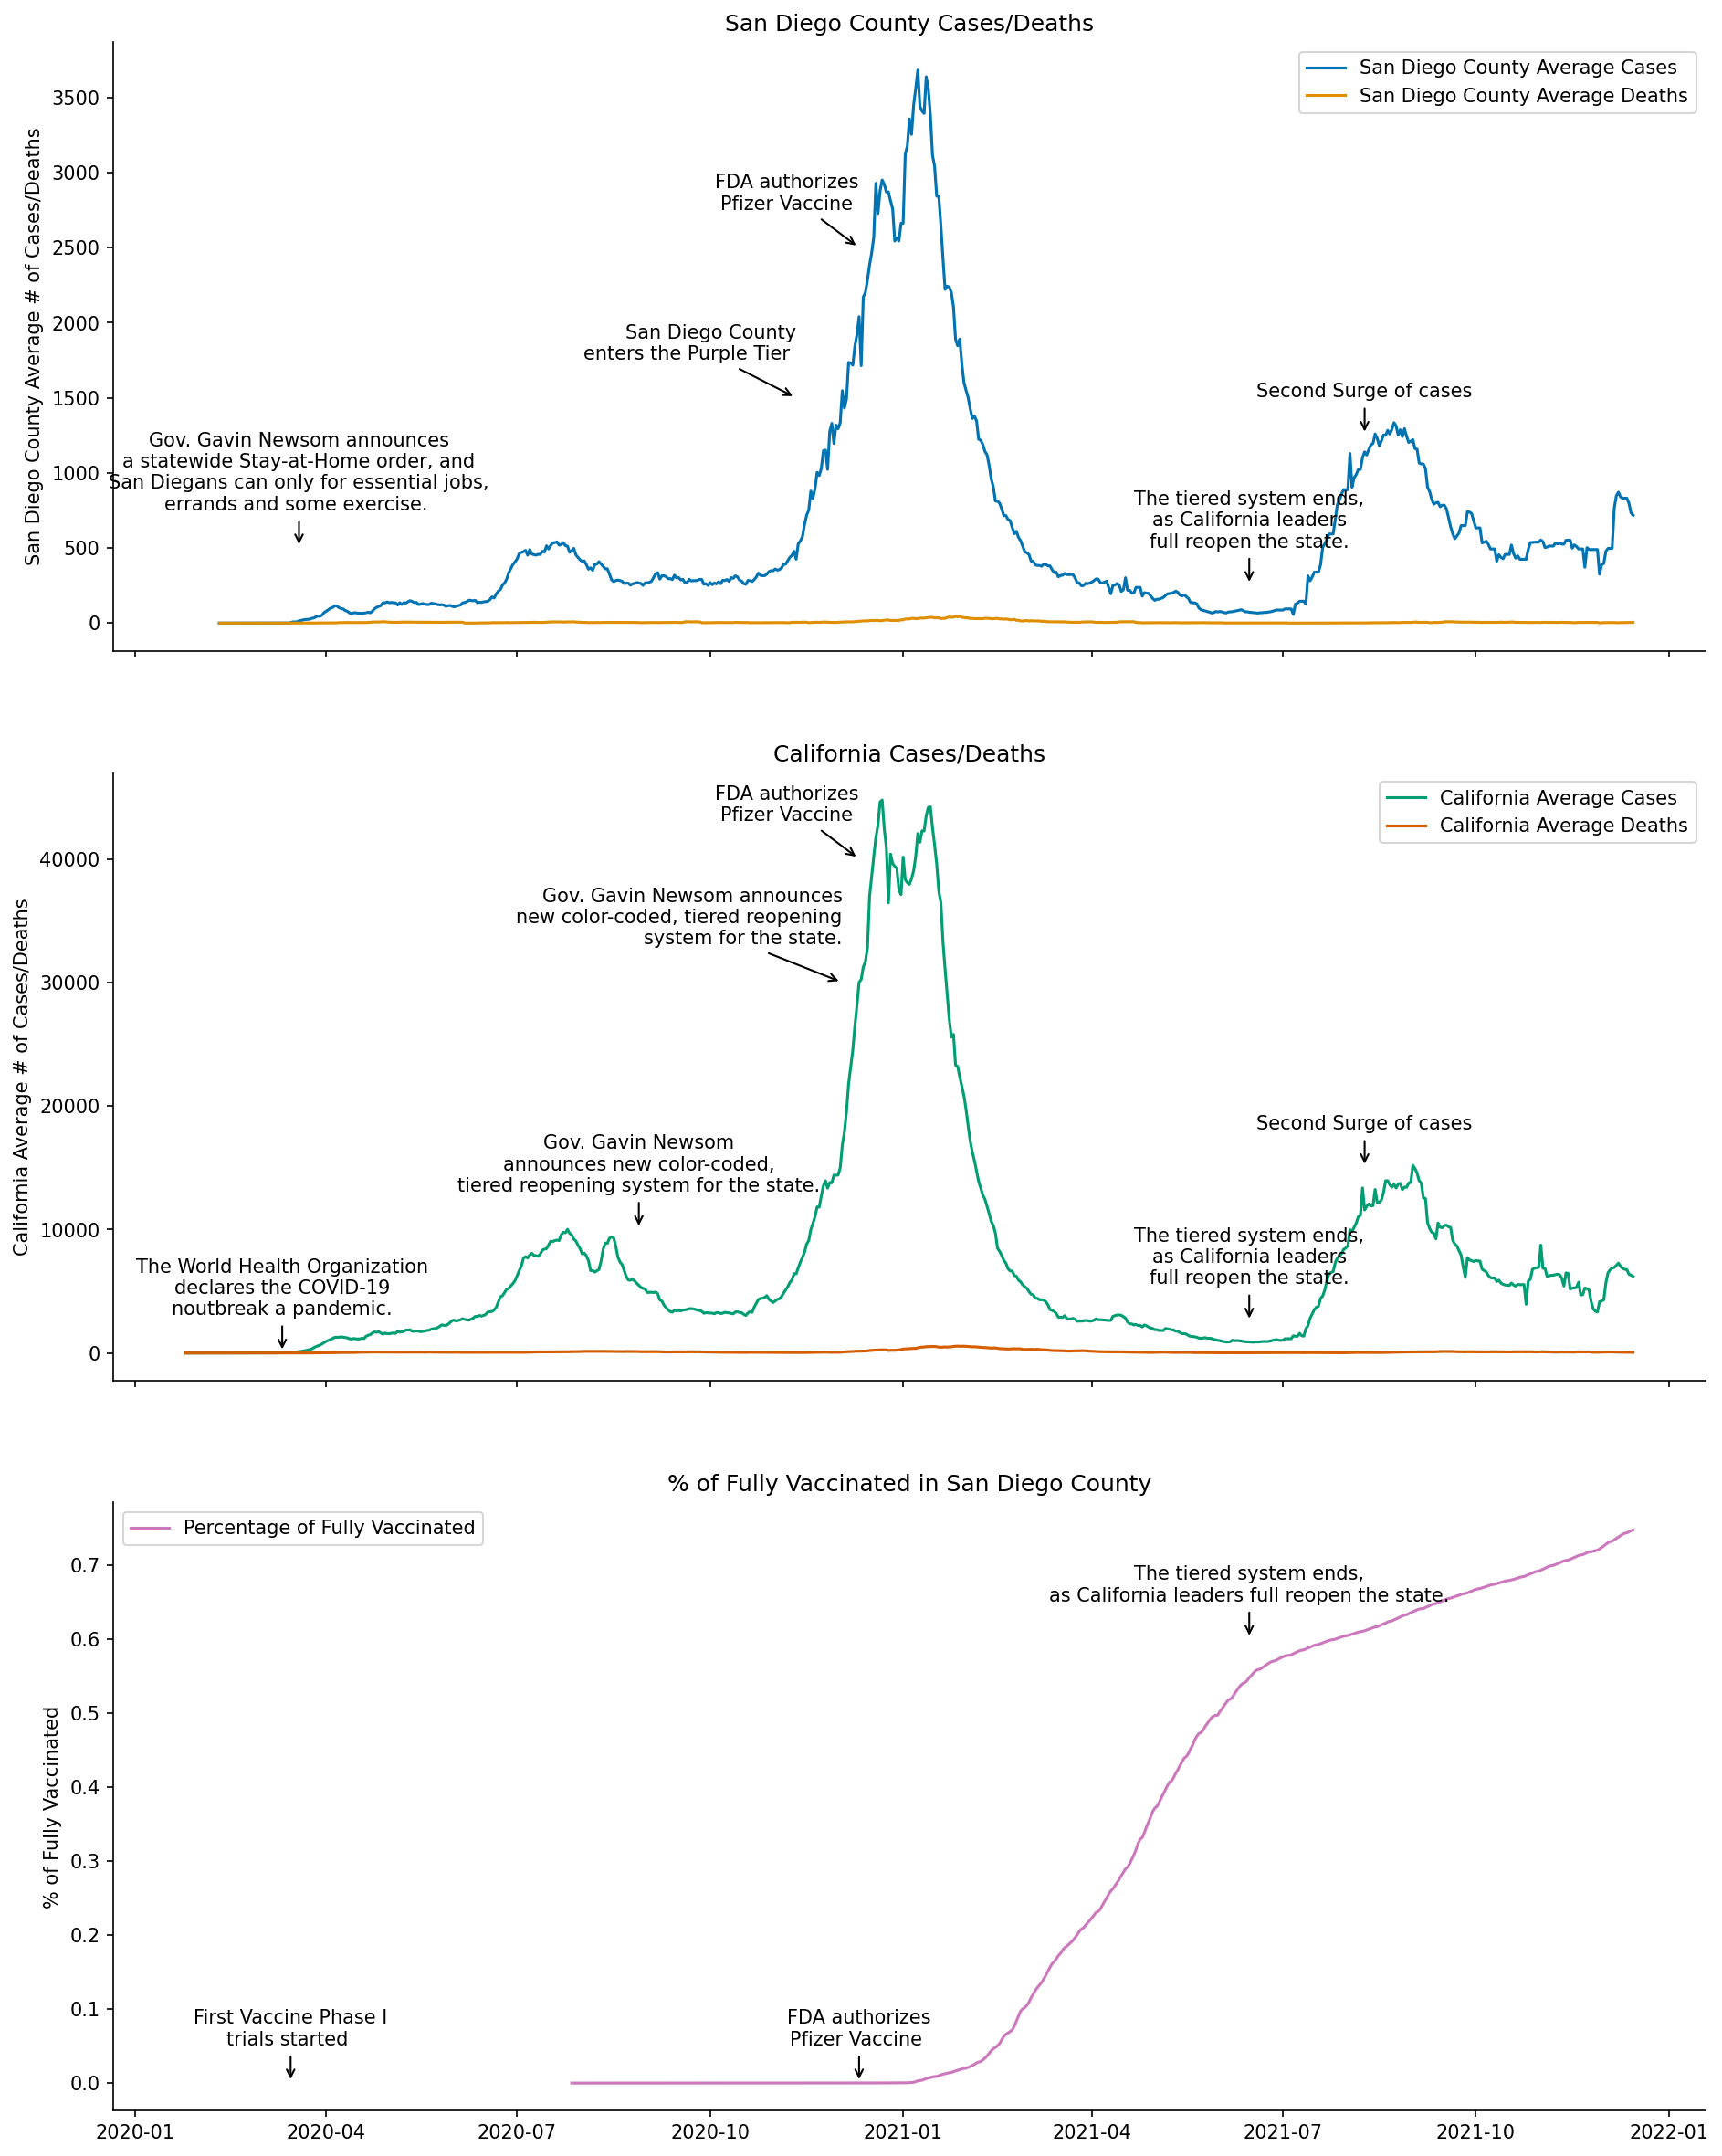

In [ ]:
fig, subs = plt.subplots(3, 1, figsize=(15,20), dpi=150, sharex=True)

subs[0].plot(san_Diego['date'],san_Diego['cases_avg'], label='San Diego County Average Cases', color=colors[0])
subs[0].plot(san_Diego['date'],san_Diego['deaths_avg'], label='San Diego County Average Deaths', color=colors[1])
subs[0].set_ylabel('San Diego County Average # of Cases/Deaths')
subs[0].set_title('San Diego County Cases/Deaths')

subs[0].annotate('FDA authorizes\nPfizer Vaccine ', 
                    xy=(dt.datetime(2020,12, 11), 2500), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='right')
subs[0].annotate('Gov. Gavin Newsom announces\na statewide Stay-at-Home order, and\nSan Diegans can only for essential jobs,\nerrands and some exercise. ', 
                    xy=(dt.datetime(2020,3, 19), 500), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')
subs[0].annotate('San Diego County\nenters the Purple Tier ', 
                    xy=(dt.datetime(2020,11, 11), 1500), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='right')
subs[0].annotate('Second Surge of cases', 
                    xy=(dt.datetime(2021,8, 9), 1250), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')
subs[0].annotate('The tiered system ends,\nas California leaders\nfull reopen the state.', 
                    xy=(dt.datetime(2021,6, 15), 250), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')




subs[1].plot(california['date'],california['cases_avg'], label='California Average Cases', color=colors[2])
subs[1].plot(california['date'],california['deaths_avg'], label='California Average Deaths', color=colors[3])
subs[1].set_ylabel('California Average # of Cases/Deaths')
subs[1].set_title('California Cases/Deaths')
subs[1].annotate('FDA authorizes\nPfizer Vaccine ', 
                    xy=(dt.datetime(2020,12, 11), 40000), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='right')
subs[1].annotate('The World Health Organization\ndeclares the COVID-19\nnoutbreak a pandemic.', 
                    xy=(dt.datetime(2020,3, 11), 0), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')                    
subs[1].annotate('Gov. Gavin Newsom\nannounces new color-coded,\ntiered reopening system for the state.', 
                    xy=(dt.datetime(2020,8, 28), 10000), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')
subs[1].annotate('Gov. Gavin Newsom announces\nnew color-coded, tiered reopening\nsystem for the state.', 
                    xy=(dt.datetime(2020,12, 3), 30000), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='right')
subs[1].annotate('The tiered system ends,\nas California leaders\nfull reopen the state.', 
                    xy=(dt.datetime(2021,6, 15), 2500), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')
subs[1].annotate('Second Surge of cases', 
                    xy=(dt.datetime(2021,8, 9), 15000), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')

subs[2].plot(sd_Vax['date'], sd_Vax['fully_vaccinated_percent'], label='Percentage of Fully Vaccinated', color=colors[4])
subs[2].set_ylabel('% of Fully Vaccinated')
subs[2].set_title('% of Fully Vaccinated in San Diego County')
subs[2].annotate('First Vaccine Phase I\ntrials started ', 
                    xy=(dt.datetime(2020,3, 15), 0), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')
subs[2].annotate('FDA authorizes\nPfizer Vaccine ', 
                    xy=(dt.datetime(2020,12, 11), 0), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')
subs[2].annotate('The tiered system ends,\nas California leaders full reopen the state.', 
                    xy=(dt.datetime(2021,6, 15), 0.6), 
                    xytext=(0,20), textcoords='offset points', arrowprops={'arrowstyle':'->'}, ha='center')

subs[0].legend()
subs[1].legend()
subs[2].legend()

sns.despine()

## 2) Vaccination rates and Death Rates with the Politically polar Counties in California
* Lassen County 74% GOP
* San Francisco County DEM 85%


In [ ]:
# Voting Data of all counties in US
county_voting = pd.read_csv('https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv')
# the per_point_diff column tells us the fraction of GOP votes - fraction of DEM votes
county_voting.head(2)

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623


In [ ]:
county_voting[county_voting['county_name']=='Lassen County']

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
214,California,6035,Lassen County,8970,2799,11985,6171,0.748436,0.233542,0.514894


In [ ]:
county_voting[county_voting['county_name']=='San Francisco County']

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
234,California,6075,San Francisco County,56417,378156,443458,-321739,0.127221,0.852744,-0.725523


In [ ]:
lassen_County = counties[counties['county']=='Lassen']
lassen_Vax = county_vax[county_vax['county']=='Lassen']
san_Francisco_County = counties[counties['county']=='San Francisco']
sf_Vax = county_vax[county_vax['county']=='San Francisco']

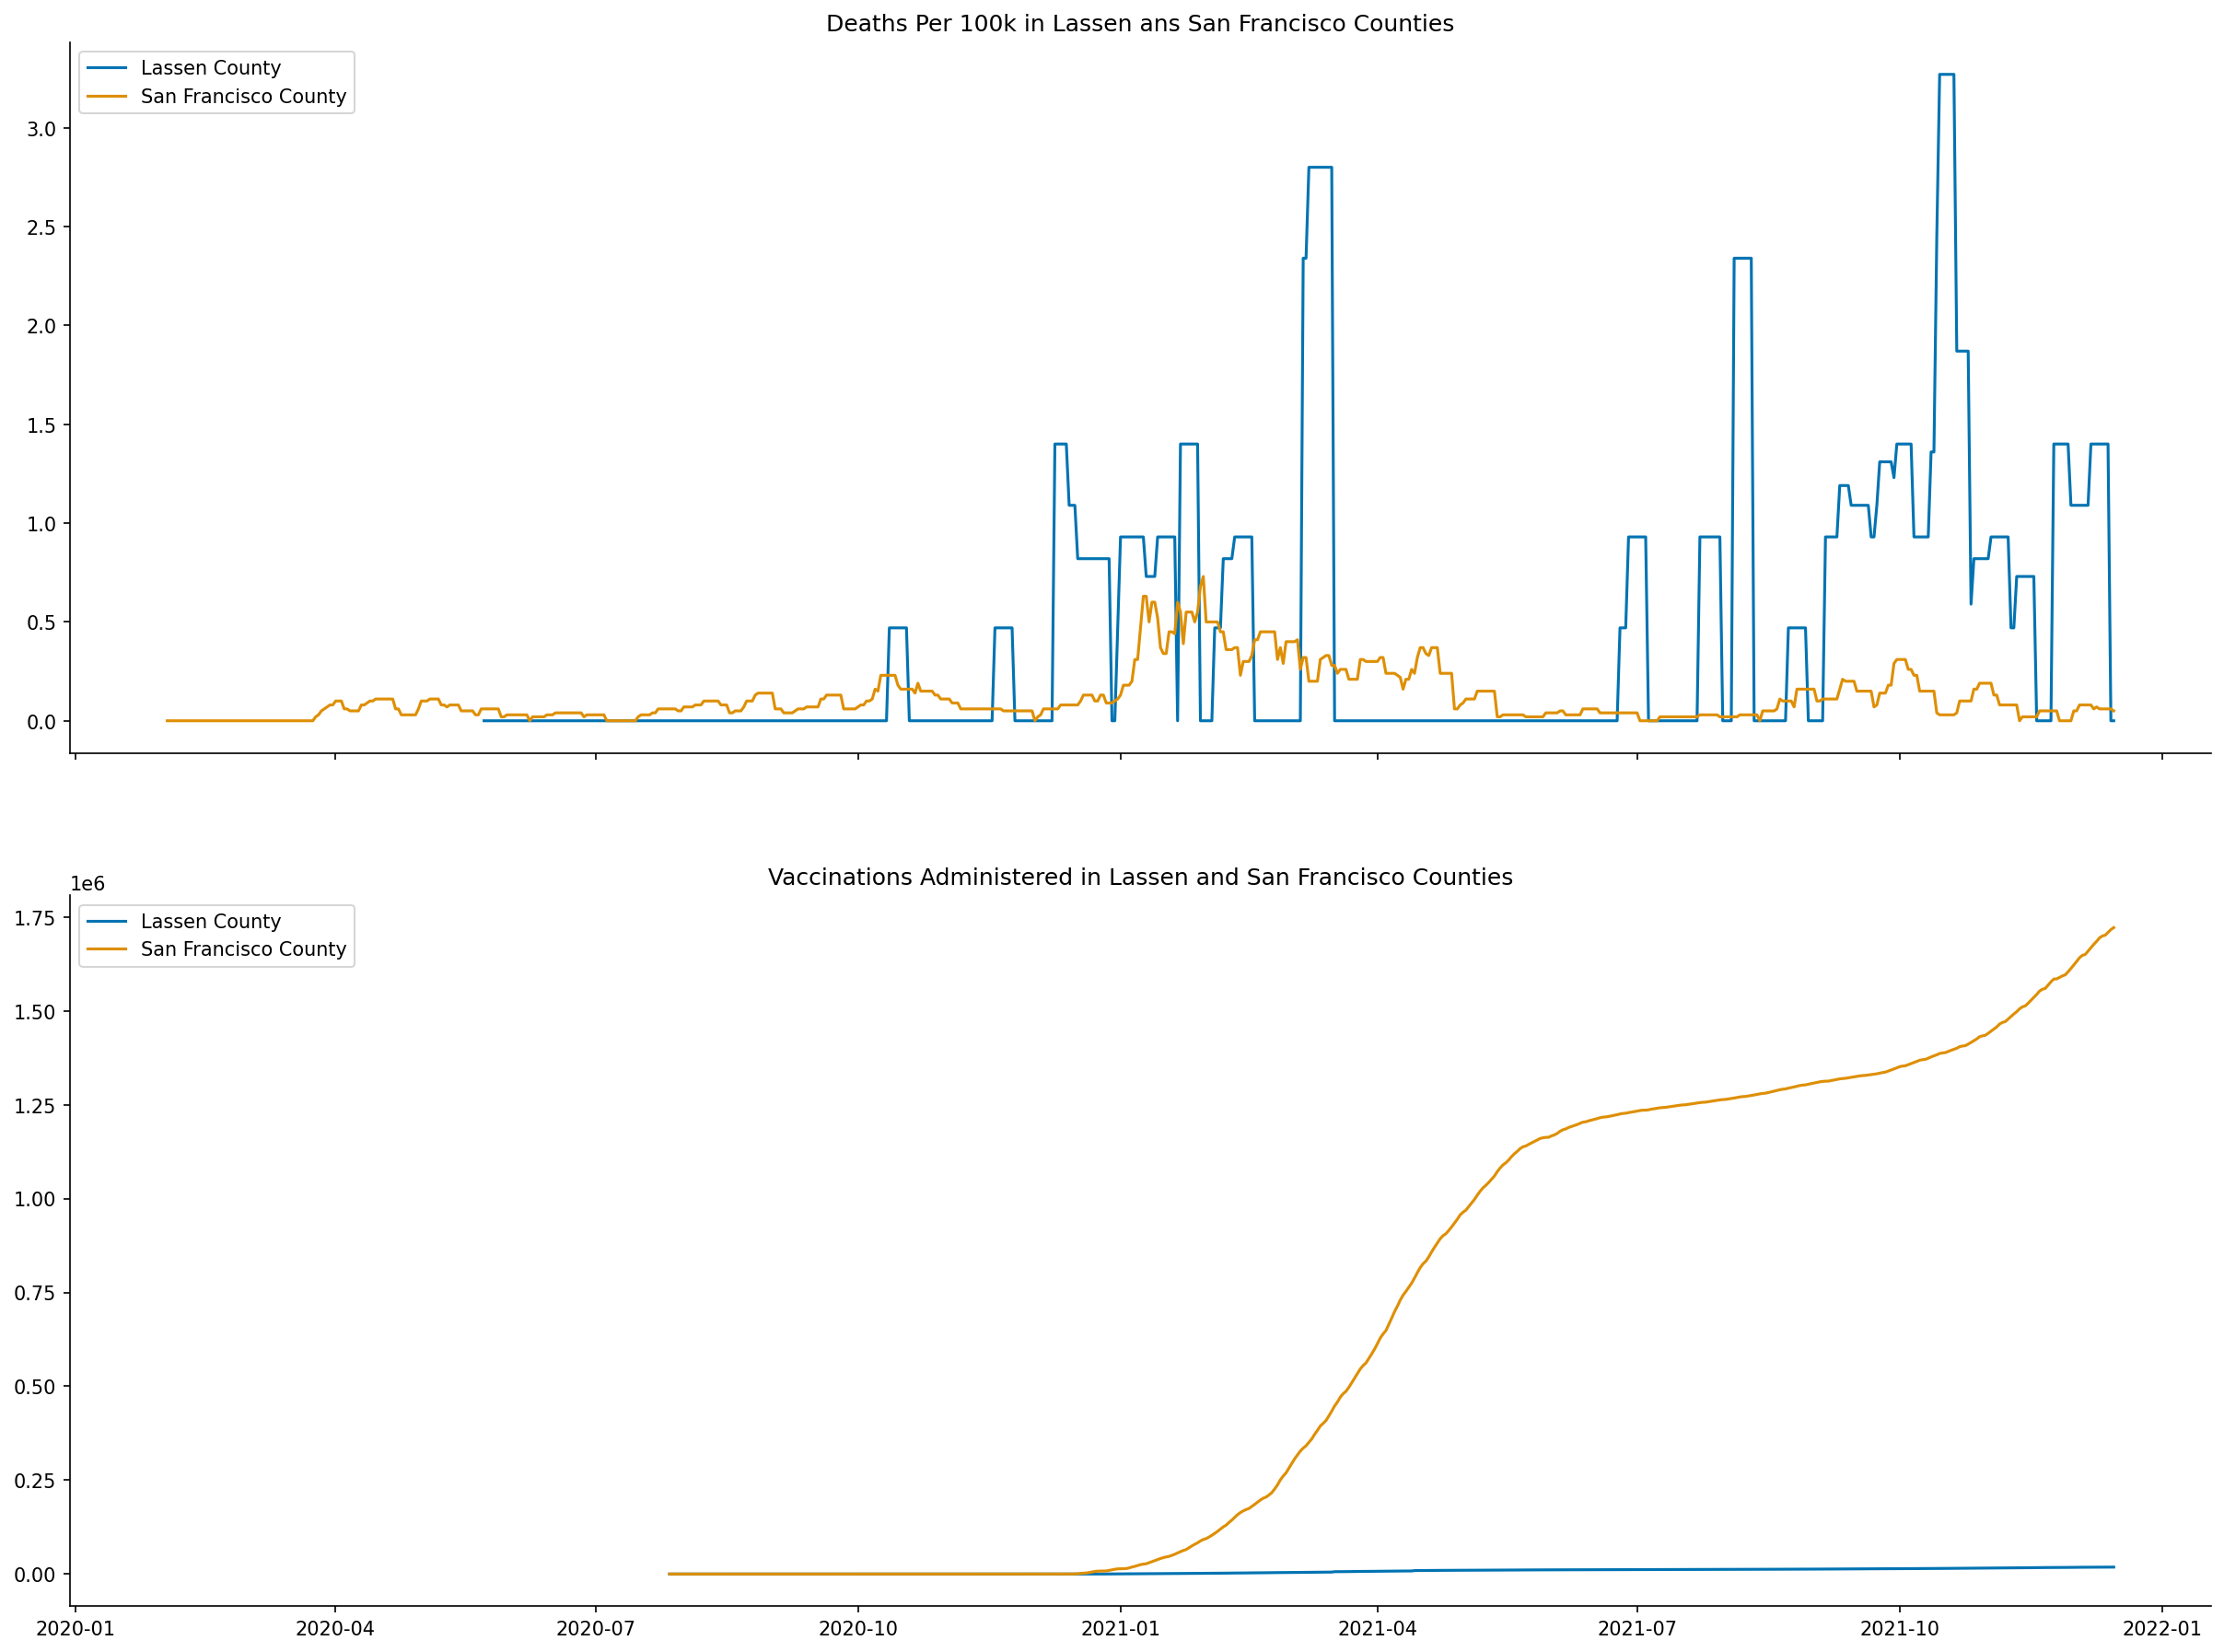

In [ ]:

fig, subs = plt.subplots(2, 1, figsize=(20,15), dpi=150, sharex=True)

subs[0].plot(lassen_County['date'],lassen_County['deaths_avg_per_100k'], label='Lassen County', color=colors[0])
subs[0].plot(san_Francisco_County['date'],san_Francisco_County['deaths_avg_per_100k'], label='San Francisco County', color=colors[1])
subs[0].set_title('Deaths Per 100k in Lassen ans San Francisco Counties')

subs[1].plot(lassen_Vax['date'],lassen_Vax['doses_administered'], label='Lassen County', color=colors[0])
subs[1].plot(sf_Vax['date'],sf_Vax['doses_administered'], label='San Francisco County', color=colors[1])
subs[1].set_title('Vaccinations Administered in Lassen and San Francisco Counties')

subs[0].legend()
subs[1].legend()
sns.despine()

If you want to pursue an independent question, here are a few places to start looking for data:

* [LA Times covid data](https://github.com/datadesk/california-coronavirus-data)
* [New York Times covid data](https://github.com/nytimes/covid-19-data)
* [Our world in data (covid data)](https://github.com/owid/covid-19-data)
* [Our world in data (general worldwide datasets)](https://github.com/owid/owid-datasets/tree/master/datasets)
* [Datasets from dataopian](https://github.com/datasets)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb05a2ae-00bc-4678-bee0-af03c07555b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>